<a href="https://colab.research.google.com/github/Zlhoon/bigdata/blob/main/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추측통계의 기본

## 모집단과 표본

### 표본의 추출방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [3]:
np.random.choice([1, 2, 3], 3)

array([3, 3, 2])

In [6]:
np.random.choice([1, 2, 3], 3, replace=False) #반복x

array([2, 1, 3])

In [13]:
np.random.seed(1)
np.random.choice([1, 2, 3], 3)

array([2, 1, 1])

In [14]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [15]:
scores.mean()

69.530

In [16]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률의 기본

### 확률분포

In [17]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [23]:
np.random.choice(dice, p=prob)

5

In [19]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [29]:
freq,_ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


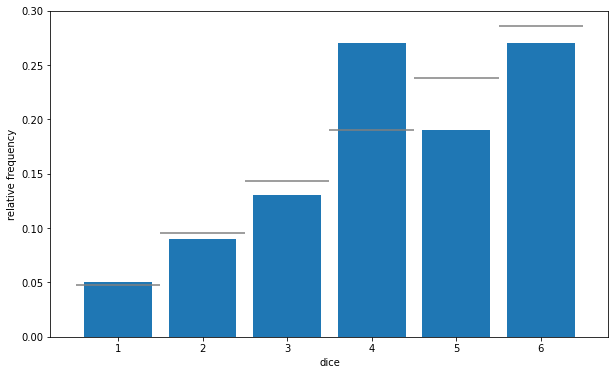

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

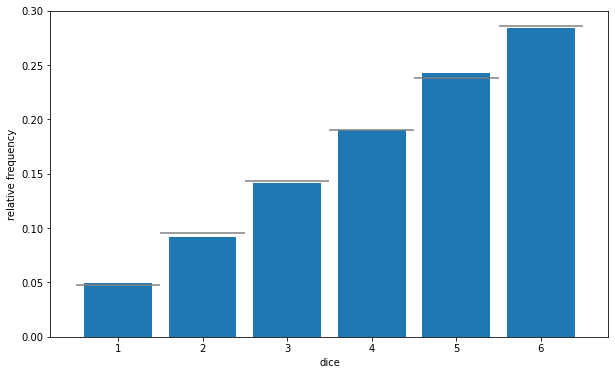

In [31]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

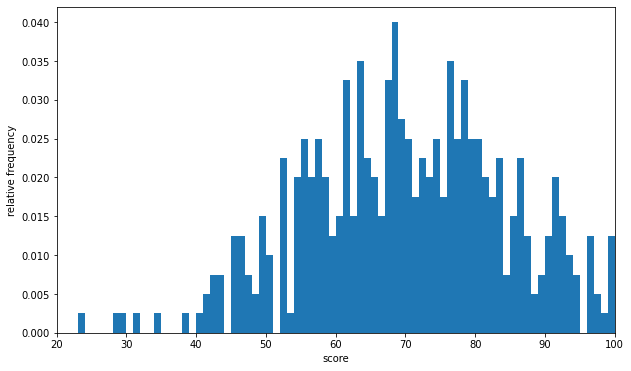

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [33]:
np.random.choice(scores)

58

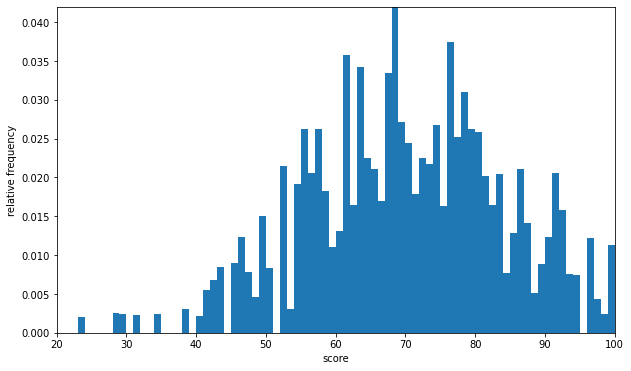

In [34]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

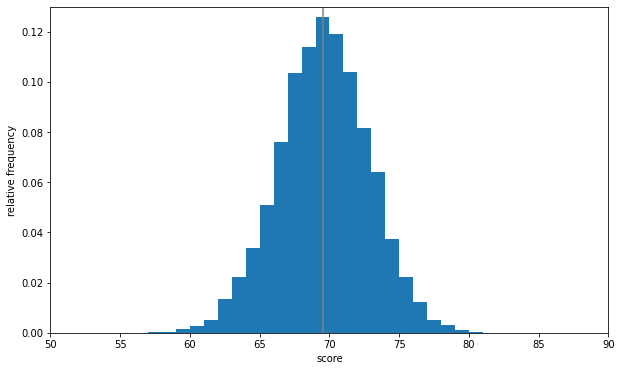

In [35]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이제부터 배우는 것